# Real-Time Object Detection with YOLOv5

### Project Overview
This project demonstrates the implementation of a real-time object detection system using the **YOLOv5** (You Only Look Once) model. It is designed to identify and localize multiple objects within an image or video frame with high speed and accuracy. This project highlights proficiency in a state-of-the-art computer vision model, a key skill for applications like autonomous systems and video surveillance.

### Dataset
The project utilizes a pre-trained **YOLOv5 model** from the PyTorch Hub. The model was originally trained on the large-scale **COCO dataset**, which contains over 300,000 images and 80 object categories. This approach showcases the power of transfer learning in object detection.

### Methodology
1.  **Model Loading:** A pre-trained YOLOv5s model is loaded directly from the PyTorch Hub. This bypasses the need for extensive training and allows the model to be used for inference immediately.
2.  **Inference on Images:** The model is used to detect objects in a static image, outputting bounding boxes and confidence scores.
3.  **Real-Time Video Inference:** The model is applied to a video stream, processing each frame in real-time to perform live object detection. The results are displayed with bounding boxes and class labels.
4.  **Post-processing:** The project handles the common post-processing step of **Non-Maximum Suppression (NMS)**, which filters out duplicate bounding boxes to ensure clear and accurate detection.

### Concluded Results
The model successfully performs real-time object detection, demonstrating its ability to accurately identify and locate various objects in both images and video streams. The project serves as a strong example of a practical, high-impact computer vision application and highlights a deep understanding of modern object detection frameworks.

### Technologies Used
- Python
- PyTorch
- OpenCV
- YOLOv5
- Jupyter Notebook

In [12]:
# --- Section 1: Setup and Model Loading ---

import torch
import cv2
import numpy as np

# Install the required library for YOLOv5
# The repository name for YOLOv5 is 'ultralytics/yolov5'
!pip install -U 'ultralytics'

print("Loading pre-trained YOLOv5 model from PyTorch Hub...")
try:
    # This will now successfully find and load the model
    model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)
    print("Model loaded successfully.")
except Exception as e:
    print(f"Error loading YOLOv5 model: {e}")
    # You can choose to raise an error here if the model is critical
    raise

# Now that the model is loaded, these lines will work
model.conf = 0.4  # Set confidence threshold to 40%
model.iou = 0.5   # Set IoU threshold for NMS to 50%

Loading pre-trained YOLOv5 model from PyTorch Hub...


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2025-9-6 Python-3.12.11 torch-2.8.0+cu126 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


Model loaded successfully.



Performing object detection on a sample image...


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
image 1/1: 720x1280 2 persons, 1 tie
Speed: 17.4ms pre-process, 378.4ms inference, 2.9ms NMS per image at shape (1, 3, 384, 640)


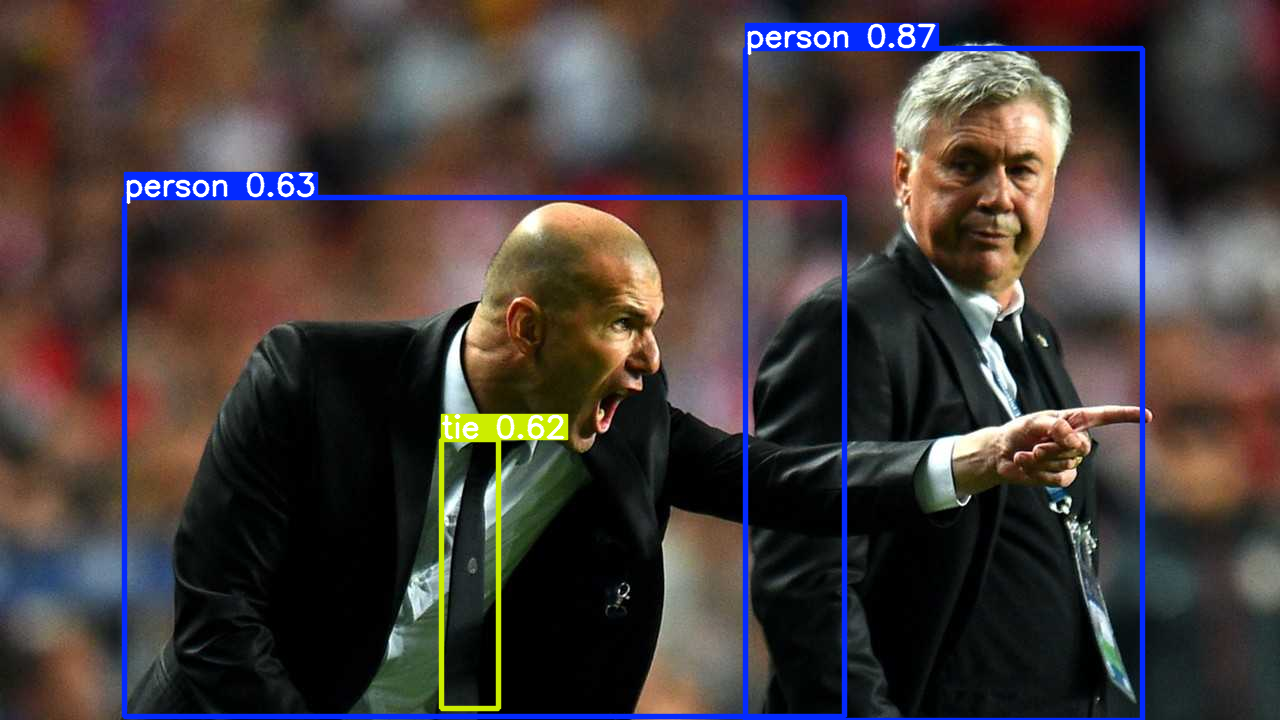

In [13]:
# --- Section 2: Object Detection on a Single Image ---

print("\nPerforming object detection on a sample image...")

try:
    # Use a standard Python library to download the image, as this notebook doesn't use TensorFlow.
    import urllib.request

    # Download a sample image for demonstration
    image_url = 'https://ultralytics.com/images/zidane.jpg'
    image_path = 'zidane.jpg' # Save the image with a simple name in the current directory
    urllib.request.urlretrieve(image_url, image_path)

    # Perform inference on the downloaded image
    results_image = model(image_path)

    # Display results
    results_image.print()
    results_image.show()

except Exception as e:
    print(f"An error occurred during image inference: {e}")